<a href="https://colab.research.google.com/github/AnnJungChan/youngjin_TECH/blob/main/AutoEncoder/AutoEncoder_right_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install datetime
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import sklearn.metrics as metric
from sklearn import preprocessing
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
no1_process1 = pd.read_csv("/content/gdrive/MyDrive/용접데이터/one_original.csv", encoding = 'cp949')

In [3]:
no1_process1=no1_process1[['날짜','시간','전류.A.','전압.V.','가스.l.min.','용접시간.sec.','팁누적개수','NUM.EA.','판단' ]]
no1_process1=no1_process1.rename(columns = {'날짜' : 'date', '시간' : 'time', '전류.A.' :'A', '전압.V.' : 'V', '가스.l.min.' : 'gas', '용접시간.sec.' : 'sec', '팁누적개수' : 'tip_cum',
                                            '판단' : 'decision'})
no1_process1["date_time"]=no1_process1["date"] + " " + no1_process1["time"]

In [4]:
no1_process1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437370 entries, 0 to 437369
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       437370 non-null  object 
 1   time       437370 non-null  object 
 2   A          437370 non-null  float64
 3   V          437370 non-null  float64
 4   gas        437370 non-null  float64
 5   sec        437370 non-null  float64
 6   tip_cum    437370 non-null  int64  
 7   NUM.EA.    437370 non-null  int64  
 8   decision   437370 non-null  object 
 9   date_time  437370 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 33.4+ MB


In [5]:
no1_process1=no1_process1.sort_values("date_time")
no1_process1=no1_process1.loc[(no1_process1['date'] <= '2021-10-29') & (no1_process1['date'] >= '2021-01-04'),:]
no1_process1=no1_process1.reset_index()
no1_process1.drop(columns = ['index'], inplace = True)

In [6]:
no1_process1['date_time']

0         2021-01-04 08:40:09
1         2021-01-04 08:40:29
2         2021-01-04 08:40:44
3         2021-01-04 08:40:59
4         2021-01-04 08:41:15
                 ...         
303233    2021-10-29 12:20:39
303234    2021-10-29 12:22:10
303235    2021-10-29 12:22:30
303236    2021-10-29 12:24:11
303237    2021-10-29 12:24:34
Name: date_time, Length: 303238, dtype: object

In [7]:
len(no1_process1['date'].unique())

208

In [8]:
no1_process1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303238 entries, 0 to 303237
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       303238 non-null  object 
 1   time       303238 non-null  object 
 2   A          303238 non-null  float64
 3   V          303238 non-null  float64
 4   gas        303238 non-null  float64
 5   sec        303238 non-null  float64
 6   tip_cum    303238 non-null  int64  
 7   NUM.EA.    303238 non-null  int64  
 8   decision   303238 non-null  object 
 9   date_time  303238 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 23.1+ MB


In [9]:
no1_process1.describe()

,A,V,gas,sec,tip_cum,NUM.EA.
count,303238.000000,303238.000000,303238.000000,303238.000000,303238.000000,303238.000000
mean,51.728885,22.612416,5.769587,6.723999,24201.604149,71.194032
std,4.309735,1.135283,0.903231,0.524081,14750.610025,5.371876
min,6.800000,12.540000,2.640000,0.000000,1.000000,1.000000
25%,49.000000,21.820000,5.170000,6.200000,11088.000000,66.000000
50%,50.800000,22.690000,5.790000,7.000000,23867.000000,74.000000
75%,53.400000,23.400000,6.360000,7.200000,37200.000000,76.000000
max,75.300000,27.580000,9.050000,7.400000,50240.000000,92.000000


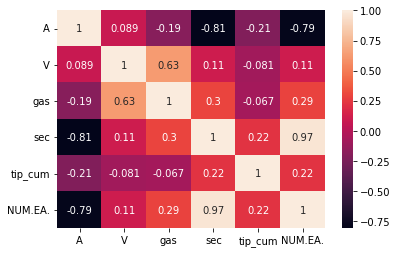

In [10]:
sns.heatmap(no1_process1.corr(),annot = True)

- (A, sec, NUM.EA.)
- (V, gas)

In [863]:
no1_process1 = no1_process1[no1_process1['date']<'2021-10-01']
no1_process1 = no1_process1[no1_process1['date']>'2021-03-01']

In [11]:
real_error_data1=pd.read_csv("/content/gdrive/MyDrive/용접데이터/일별데이터/일별 관측치 1호기_프로세스2.csv")
real_error_data1=real_error_data1.drop(columns = ["Unnamed: 0"])[['date','용접 불량','실제불량갯수']]
real_error_data2=pd.read_csv("/content/gdrive/MyDrive/용접데이터/일별데이터/일별 관측치 1호기_프로세스1.csv")
real_error_data2=real_error_data2.drop(columns = ["Unnamed: 0"])[['date','용접 불량','실제불량갯수']][1:]
real_error_data=pd.concat([real_error_data1, real_error_data2])

In [12]:
date_right=real_error_data.loc[real_error_data['용접 불량'] == 0,"date"]
date_right = date_right.reset_index().drop(columns = ["index"])
date_error=real_error_data.loc[real_error_data['용접 불량'] != 0,"date"]
date_error = date_error.reset_index().drop(columns = ["index"])

In [13]:
real_error_data['용접 불량'].sum()

729

# 데이터 right/error 나누기

In [14]:
list_right = []
for i in range(len(date_right)) :
  list_right.append(no1_process1[no1_process1['date'] == date_right['date'][i]])

In [15]:
temp_right = list_right[0]
for i in range(1,len(list_right),1) :
  temp_right = pd.concat([temp_right,list_right[i]])

right = temp_right

In [16]:
list_error = []
for i in range(len(date_error)) :
  list_error.append(no1_process1[no1_process1['date'] == date_error['date'][i]])

In [17]:
temp_error = list_error[0]
for i in range(1,len(list_error),1) :
  temp_error = pd.concat([temp_error,list_error[i]])

error = temp_error

# 원 데이터 특성파악

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
temp_right[['A','V','gas','sec']].corr()

,A,V,gas,sec
A,1.000000,0.121124,-0.151071,-0.827440
V,0.121124,1.000000,0.613329,0.058013
gas,-0.151071,0.613329,1.000000,0.216220
sec,-0.827440,0.058013,0.216220,1.000000


- A와 sec
- V와 gas

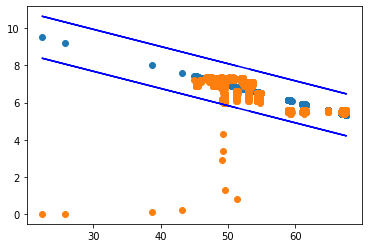

In [20]:
import matplotlib.pyplot as plt
model = LinearRegression()
np_A = np.array(temp_right['A']).reshape(-1,1)
np_sec = np.array(temp_right['sec']).reshape(-1,1)
model.fit(np_A,np_sec)
plt.scatter(np_A,model.predict(np_A))
plt.plot(np_A,model.predict(np_A) + 3*np.std(model.predict(np_A)), color = 'blue')
plt.plot(np_A,model.predict(np_A) - 3*np.std(model.predict(np_A)), color = 'blue')
plt.scatter(np_A,np_sec)

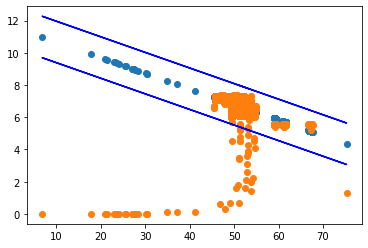

In [21]:
import matplotlib.pyplot as plt
model = LinearRegression()
np_A = np.array(temp_error['A']).reshape(-1,1)
np_sec = np.array(temp_error['sec']).reshape(-1,1)
model.fit(np_A,np_sec)
plt.scatter(np_A,model.predict(np_A))
plt.plot(np_A,model.predict(np_A) + 3*np.std(model.predict(np_A)), color = 'blue')
plt.plot(np_A,model.predict(np_A) - 3*np.std(model.predict(np_A)), color = 'blue')
plt.scatter(np_A,np_sec)

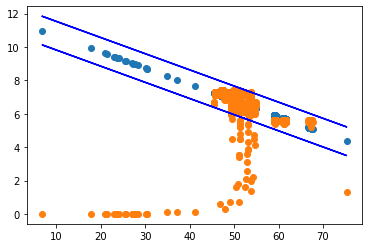

In [22]:
import matplotlib.pyplot as plt
model = LinearRegression()
np_V = np.array(temp_right['V']).reshape(-1,1)
np_gas = np.array(temp_right['gas']).reshape(-1,1)
model.fit(np_A,np_sec)
plt.scatter(np_A,model.predict(np_A))
plt.plot(np_A,model.predict(np_A) + 2*np.std(model.predict(np_A)), color = 'blue')
plt.plot(np_A,model.predict(np_A) - 2*np.std(model.predict(np_A)), color = 'blue')
plt.scatter(np_A,np_sec)

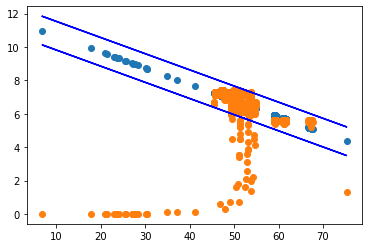

In [23]:
import matplotlib.pyplot as plt
model = LinearRegression()
np_V = np.array(temp_error['V']).reshape(-1,1)
np_gas = np.array(temp_error['gas']).reshape(-1,1)
model.fit(np_A,np_sec)
plt.scatter(np_A,model.predict(np_A))
plt.plot(np_A,model.predict(np_A) + 2*np.std(model.predict(np_A)), color = 'blue')
plt.plot(np_A,model.predict(np_A) - 2*np.std(model.predict(np_A)), color = 'blue')
plt.scatter(np_A,np_sec)

# 리셋버튼

In [168]:
right = temp_right
error = temp_error

# good 만 살리기

In [169]:
right=right[right['decision'] == 'GOOD']

# 회귀값 어긋나면 빼기

In [26]:
A =np.array(right['A']).reshape(-1,1)
V =np.array(right['V']).reshape(-1,1)
gas = np.array(right['gas']).reshape(-1,1)
sec= np.array(right['sec']).reshape(-1,1)

In [27]:
from sklearn.linear_model import LinearRegression

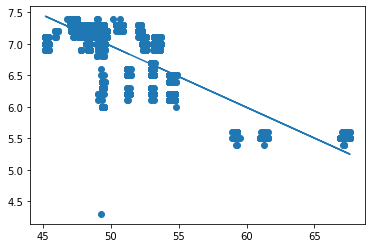

In [28]:
model_A_sec = LinearRegression()
model_A_sec.fit(A,sec)
predict_sec = model_A_sec.predict(A)
plt.plot(A, predict_sec)
plt.scatter(A,sec)

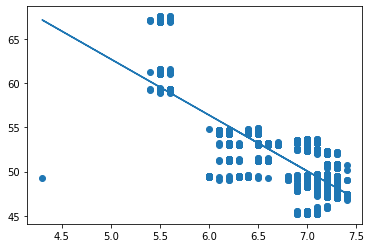

In [29]:
model_sec_A = LinearRegression()
model_sec_A.fit(sec,A)
predict_A = model_sec_A.predict(sec)
plt.plot(sec, predict_A)
plt.scatter(sec,A)

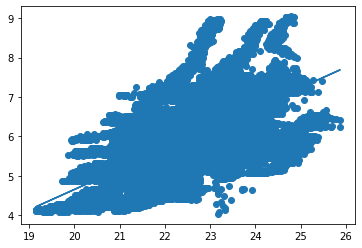

In [30]:
model_V_gas = LinearRegression()
model_V_gas.fit(V,gas)
predict_gas = model_V_gas.predict(V)
plt.plot(V, predict_gas)
plt.scatter(V,gas)

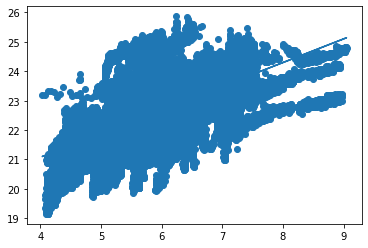

In [31]:
model_gas_V = LinearRegression()
model_gas_V.fit(gas,V)
predict_V = model_gas_V.predict(gas)
plt.plot(gas, predict_V)
plt.scatter(gas,V)

In [170]:
right = right[(right['A']>=np.mean(predict_A)-2*np.std(predict_A)) & (right['A']<=np.mean(predict_A)+2*np.std(predict_A))]
right = right[(right['V']>=np.mean(predict_V)-2*np.std(predict_V)) & (right['V']<=np.mean(predict_V)+2*np.std(predict_V))]
right = right[(right['gas']>=np.mean(predict_gas)-2*np.std(predict_gas)) & (right['gas']<=np.mean(predict_gas)+2*np.std(predict_gas))]
right = right[(right['sec']>=np.mean(predict_sec)-2*np.std(predict_sec)) & (right['sec']<=np.mean(predict_sec)+2*np.std(predict_sec))]

# predict 제거

In [171]:
right['A'] = np.array(right['A']).reshape(-1,1)-model_sec_A.predict(np.array(right['sec']).reshape(-1,1))
right['sec'] = np.array(right['sec']).reshape(-1,1)-model_A_sec.predict(np.array(right['A']).reshape(-1,1))
right['V'] = np.array(right['V']).reshape(-1,1)-model_gas_V.predict(np.array(right['gas']).reshape(-1,1))
right['gas'] = np.array(right['gas']).reshape(-1,1)-model_V_gas.predict(np.array(right['V']).reshape(-1,1))

In [172]:
error['A'] = np.array(error['A']).reshape(-1,1)-model_sec_A.predict(np.array(error['sec']).reshape(-1,1))
error['sec'] = np.array(error['sec']).reshape(-1,1)-model_A_sec.predict(np.array(error['A']).reshape(-1,1))
error['V'] = np.array(error['V']).reshape(-1,1)-model_gas_V.predict(np.array(error['gas']).reshape(-1,1))
error['gas'] = np.array(error['gas']).reshape(-1,1)-model_V_gas.predict(np.array(error['V']).reshape(-1,1))

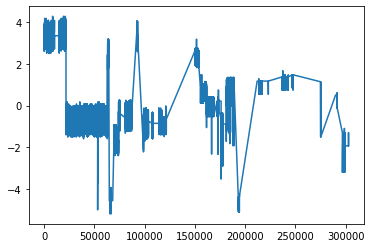

In [173]:
right['A'].plot()

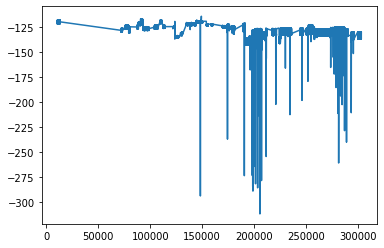

In [174]:
error['A'].plot()

# 정규화

In [175]:
model_right = right[['A','V','gas','sec']]
scaler = preprocessing.MinMaxScaler()
scaler.fit(model_right)
model_right = scaler.transform(model_right)

In [94]:
model_right.shape

(153228, 2)

In [176]:
model_error = error[['A','V','gas','sec']]
scaler = preprocessing.MinMaxScaler()
scaler.fit(model_error)
model_error = scaler.transform(model_error)

# 토치만들기

In [177]:
#!pip install torch==1.7.0 torchvision==0.8.1 torchaudio===0.7.0
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
import torch.nn as nn

In [178]:
model_right = torch.Tensor(model_right)

In [179]:
model_error = torch.Tensor(model_error)

# 모델 구현 패키지 로딩

# 모델 구형

In [192]:
# AutoEncoder 클래스 구현

class AutoEncoder(nn.Module): # 클래스 정의
    def __init__(self, input_size, hidden_size, output_size): #초기화 작업
        super(AutoEncoder, self).__init__() #우리가 입력할 값 4개
        ## initialize
        self.input_size = input_size # input_size라는 변수를 클래스 안의 변수로 변경
        self.hidden_size = hidden_size # hidden_size라는 변수를 클래스 안의 변수로 변경
        self.output_size = output_size # output_size라는 변수를 클래스 안의 변수로 변경
        ## 오토인코더 구현
        self.AutoEncoder = nn.Sequential(
        ## 인코더 부분
        nn.Linear(input_size, hidden_size[0]),#완전 연결망
        nn.RReLU(), #활성화 함수
        nn.Linear(hidden_size[0], output_size),#완전 연결망
        nn.RReLU(), #활성화 함수
        ## 디코더 부분
        nn.Linear(output_size, hidden_size[0]),#완전 연결망
        nn.RReLU(), #활성화 함수
        nn.Linear(hidden_size[0], input_size)#완전 연결망
        # 인코더와는 다르게, 출력부분에 활성화 함수를 사용하지 않음
        )
    def forward(self, inputs):
        output =self.AutoEncoder(inputs)
        
        return output

- 인코더 : 완전연결층 2개
- 디코더 : 완전연결층 2개

- 완전연결층 : 한 층의 모든 노드와 다음 층의 모든 노드가 연결 된 층

# 하이퍼 파라미터, 손실 함수 및 옵티마이저 정의

In [193]:
# 훈련 하이퍼 파라미터

epoch = 10
batch_size = 64
lr = 0.01

# 모델 하이퍼 파라미터

input_size = len(model_right[0]) # 7개가 들어감. 변수의 갯수가 7개
hidden_size = [2] #이를 3개로 줄인 후
output_size = 4 #2개로 방출

# 손실 함수로 MSE 사용

criterion = nn.MSELoss()

# 매개변수 조정 방식은 Adam

optimizer = torch.optim.Adam

# 오토인코더 정의

AutoEncoder = AutoEncoder(input_size, hidden_size, output_size)

# 오토인코더 학습 함수 정의

In [194]:
##학습 함수에 대한 정의
def train_net(AutoEncoder, data, criterion, epochs, lr_rate =0.01):
## Optimizer에 대한 정의
    optim = optimizer(AutoEncoder.parameters(), lr =lr_rate)
## 배치 학습을 시키기 위한 데이터 변환
    data_iter = DataLoader(data, batch_size =batch_size, shuffle =True)
## 에포크 학습
    for epoch in range(1, epochs +1):
        running_loss = 0.0
        for x in data_iter:
            ## 매개변수 0으로 초기화
            optim.zero_grad()
            output = AutoEncoder(x)
            ## 입력값과 출력값간의 차이인 손실값
            loss = criterion(x, output)
            ## 손실값을 기준으로 매개변수 조정
            loss.backward()
            optim.step()
            running_loss += loss.item()
            
        ## 각 에포크마다 손실 값 표기
        print('epoch: {}, loss: {:.2f}'.format(epoch, running_loss))
    return AutoEncoder

# 오토인코더 학습

In [195]:
AutoEncoder = train_net(AutoEncoder, model_right, criterion, epoch, lr)

epoch: 1, loss: 33.36
epoch: 2, loss: 7.88
epoch: 3, loss: 5.29
epoch: 4, loss: 5.13
epoch: 5, loss: 5.14
epoch: 6, loss: 5.14
epoch: 7, loss: 5.14
epoch: 8, loss: 5.14
epoch: 9, loss: 5.13
epoch: 10, loss: 5.13


# 임계값 정의 후 결과 분석 및 해석

In [196]:
train_loss_chart = []
for data in model_right :
  output = AutoEncoder(data)
  loss = criterion(output, data)
  train_loss_chart.append(loss.item())

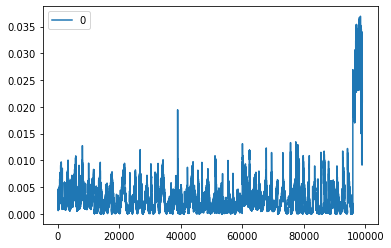

In [197]:
right_frame = pd.DataFrame(train_loss_chart)
right_frame.plot()

In [211]:
right_frame[right_frame>0.003].count()

0    36283
dtype: int64

In [199]:
test_loss_chart = []
for data in model_error :
  output = AutoEncoder(data)
  loss = criterion(output, data)
  test_loss_chart.append(loss.item())

In [200]:
test_frame=pd.DataFrame(test_loss_chart)

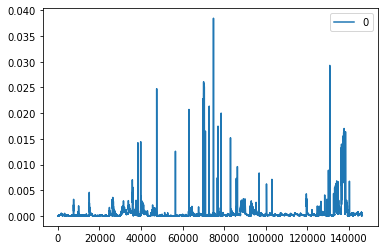

In [201]:
test_frame.plot()

In [210]:
test_frame[test_frame>0.003].count()

0    2764
dtype: int64

In [139]:
outlier = []
for i in range(len(test_loss_chart)) :
  outlier.append(test_loss_chart[i] >= 0.00019)

In [140]:
pd.merge(pd.concat([temp_error.reset_index(),pd.DataFrame(outlier)],axis = 1).groupby('date').sum()[0],real_error_data[['date','용접 불량']],how = 'left', on = 'date')

,date,0,용접 불량
0,2021-01-13,0,15
1,2021-01-14,0,6
2,2021-03-19,0,1
3,2021-03-23,0,2
4,2021-03-24,0,21
...,...,...,...
91,2021-10-18,1,2
92,2021-10-21,0,4
93,2021-10-22,0,1
94,2021-10-27,0,2
